# Build a multiple linear regression model

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model
**The goal** is to build a multiple linear regression model and evaluate the model
<br/>


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error


In [46]:
df0=pd.read_csv("data/2017_Yellow_Taxi_Trip_Data.csv") 
df0

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20
22696,74239933,2,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00


###  Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

In [47]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [48]:
df0.shape

(22699, 18)

Check for missing data and duplicates

In [49]:
df0.isna().count()

Unnamed: 0               22699
VendorID                 22699
tpep_pickup_datetime     22699
tpep_dropoff_datetime    22699
passenger_count          22699
trip_distance            22699
RatecodeID               22699
store_and_fwd_flag       22699
PULocationID             22699
DOLocationID             22699
payment_type             22699
fare_amount              22699
extra                    22699
mta_tax                  22699
tip_amount               22699
tolls_amount             22699
improvement_surcharge    22699
total_amount             22699
dtype: int64

In [50]:
df = df0.drop_duplicates()
df

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20
22696,74239933,2,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00


Use `.describe()`.

In [51]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


###  Convert pickup & dropoff columns to datetime


In [52]:
df['tpep_pickup_datetime']

0         03/25/2017 8:55:43 AM
1         04/11/2017 2:53:28 PM
2         12/15/2017 7:26:56 AM
3         05/07/2017 1:17:59 PM
4        04/15/2017 11:32:20 PM
                  ...          
22694     02/24/2017 5:37:23 PM
22695     08/06/2017 4:43:59 PM
22696     09/04/2017 2:54:14 PM
22697    07/15/2017 12:56:30 PM
22698     03/02/2017 1:02:49 PM
Name: tpep_pickup_datetime, Length: 22699, dtype: object

In [53]:

print('Data type of tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)
# Convert `tpep_pickup_datetime` to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
# Convert `tpep_dropoff_datetime` to datetime format
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

# Display data types of `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print('Data type of tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)


Data type of tpep_pickup_datetime: object
Data type of tpep_dropoff_datetime: object
Data type of tpep_pickup_datetime: datetime64[ns]
Data type of tpep_dropoff_datetime: datetime64[ns]


###  Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [54]:
df['duration'] = df['tpep_dropoff_datetime'] -df['tpep_pickup_datetime']
df['duration'] = df['duration'].apply(lambda x : pd.Timedelta(x).total_seconds()/60 )
df['duration']

0        14.066667
1        26.500000
2         7.200000
3        30.250000
4        16.716667
           ...    
22694     3.266667
22695    40.800000
22696     4.133333
22697    11.933333
22698    13.333333
Name: duration, Length: 22699, dtype: float64

### Outliers


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



### Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

<AxesSubplot:xlabel='duration'>

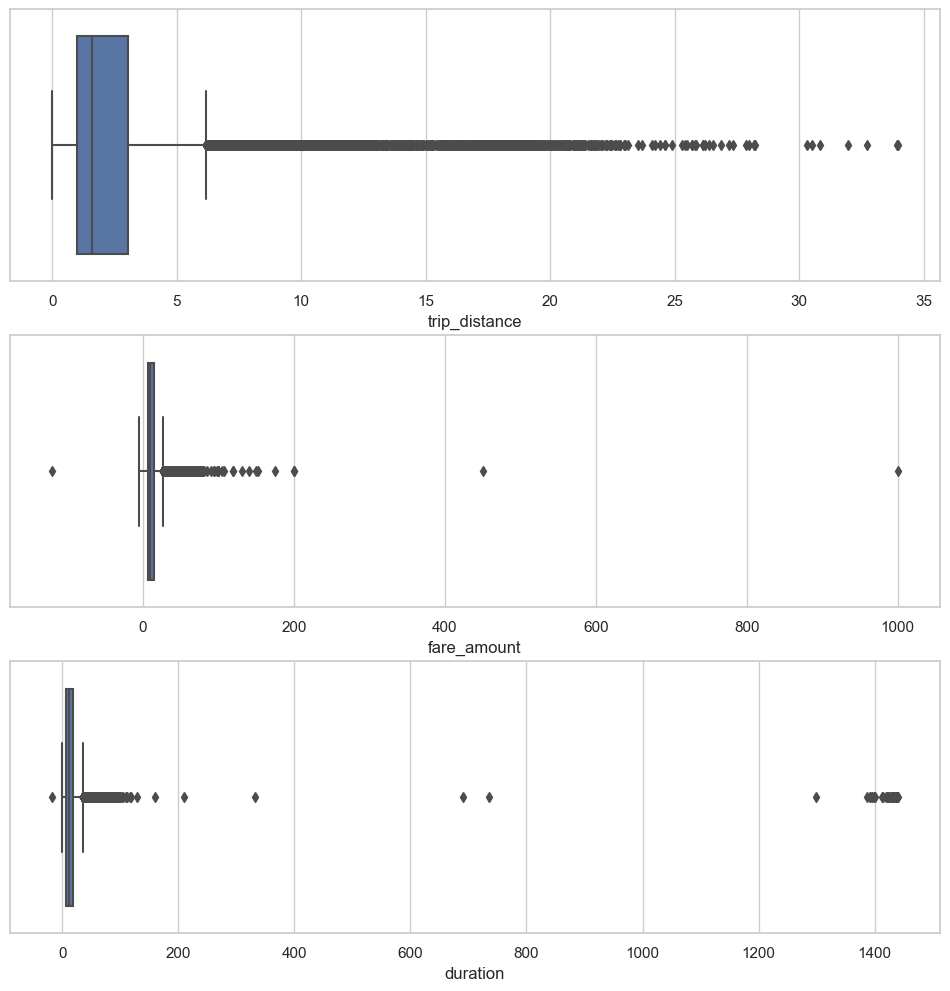

In [56]:
fig, ax = plt.subplots(3,1,figsize = (12,12))
sns.boxplot(ax=ax[0],x = df['trip_distance'])
sns.boxplot(ax = ax[1],x=  df['fare_amount'])
sns.boxplot(ax = ax[2],x =df['duration'])


In [57]:
sorted(set(df['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [58]:
sum(df['trip_distance'] == 0)

148

#### `fare_amount` outliers

In [59]:
sorted(set(df['fare_amount']))[0:10]

[-120.0, -4.5, -4.0, -3.5, -3.0, -2.5, 0.0, 0.01, 1.0, 2.5]

Impute values less than $0 with `0`.

In [60]:
# Impute values less than $0 with 0
df['fare_amount']=df['fare_amount'].apply(lambda x : 0 if x < 0 else x)
df['fare_amount'].describe()

count    22699.000000
mean        13.033832
std         13.212462
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

Now impute the maximum value as `Q3 + (6 * IQR)`.

In [61]:
def outlier_imputer(column_list, iqr_factor):
   
    for col in column_list:
        # Reassign minimum to zero
        df.loc[df[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df.loc[df[col] > upper_threshold, col] = upper_threshold
        print(df[col].describe())
       

In [62]:
outlier_imputer(['fare_amount'],6)

fare_amount
q3: 14.5
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64


#### `duration` outliers


In [63]:
df['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [64]:
# Impute a 0 for any negative values
df['duration'] = df['duration'].apply(lambda x : 0 if x<0 else x)
df['duration'].describe()

count    22699.000000
mean        17.014525
std         61.996174
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

In [65]:
# Impute the high outliers
outlier_imputer(['duration'],6)

duration
q3: 18.383333333333333
upper_threshold: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64


### Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so  cannot train a model that uses this feature.
<br>
Create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.


In [66]:
# Create `pickup_dropoff` column
df['pickup_dropoff']  =df['PULocationID'].astype(str) + ' '+ df['DOLocationID'].astype(str)
df['pickup_dropoff']

0        100 231
1         186 43
2        262 236
3         188 97
4          4 112
          ...   
22694     48 186
22695    132 164
22696    107 234
22697     68 144
22698    239 236
Name: pickup_dropoff, Length: 22699, dtype: object

Use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [67]:
grouped = df['trip_distance'].groupby(df['pickup_dropoff']).mean(numeric_only=True)
grouped

pickup_dropoff
1 1         2.433333
10 148     15.700000
100 1      16.890000
100 100     0.253333
100 107     1.180000
             ...    
97 65       0.500000
97 66       1.400000
97 80       3.840000
97 90       4.420000
97 97       1.006667
Name: trip_distance, Length: 4172, dtype: float64

In [68]:
grouped = pd.DataFrame(grouped)

In [69]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()
# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']
grouped_dict

{'1 1': 2.433333333333333,
 '10 148': 15.7,
 '100 1': 16.89,
 '100 100': 0.25333333333333335,
 '100 107': 1.18,
 '100 113': 2.024,
 '100 114': 1.94,
 '100 12': 4.55,
 '100 125': 2.84,
 '100 13': 4.201666666666667,
 '100 132': 17.2175,
 '100 137': 1.299,
 '100 138': 10.432857142857143,
 '100 140': 2.746,
 '100 141': 2.11,
 '100 142': 1.6958333333333335,
 '100 143': 1.5825,
 '100 144': 3.0066666666666664,
 '100 148': 4.1066666666666665,
 '100 151': 3.668,
 '100 152': 4.9,
 '100 158': 1.938,
 '100 161': 0.9813888888888889,
 '100 162': 1.2163636363636363,
 '100 163': 1.2656,
 '100 164': 0.841,
 '100 166': 5.199999999999999,
 '100 170': 0.8548,
 '100 177': 12.0,
 '100 181': 9.34,
 '100 186': 0.6404761904761904,
 '100 193': 4.39,
 '100 198': 9.01,
 '100 202': 5.3,
 '100 209': 4.43,
 '100 211': 2.48,
 '100 224': 1.9500000000000002,
 '100 225': 7.5,
 '100 229': 1.7850000000000001,
 '100 230': 0.72975,
 '100 231': 3.5216666666666665,
 '100 232': 3.8449999999999998,
 '100 233': 1.245833333333333

In [70]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df['mean_distance'] = df['pickup_dropoff']
# 2. Map `grouped_dict` to the `mean_distance` column
df['mean_distance']= df['mean_distance'].map(grouped_dict)
# Confirm that it worked
df['mean_distance']


0         3.521667
1         3.108889
2         0.881429
3         3.700000
4         4.435000
           ...    
22694     1.098214
22695    18.757500
22696     0.684242
22697     2.077500
22698     1.476970
Name: mean_distance, Length: 22699, dtype: float64

#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [71]:
grouped = df['duration'].groupby(df['pickup_dropoff']).mean(numeric_only=True)
grouped
grouped_dict = grouped.to_dict()
grouped_dict
# Create a dictionary where keys are unique pickup_dropoffs and values are
grouped_dict = grouped.to_dict()
grouped_dict
# mean trip duration for all trips with those pickup_dropoff combos
df['mean_duration'] = df['pickup_dropoff']
df['mean_duration'] = df['pickup_dropoff'].map(grouped_dict)
# Confirm that it worked
df[(df['DOLocationID']==231) &(df['PULocationID']== 100)][['mean_duration']]

,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [72]:
# Create 'day' col
df['day'] = df['tpep_pickup_datetime'].dt.day_name().str.lower()
# Create 'month' col
df['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

0        mar
1        apr
2        dec
3        may
4        apr
        ... 
22694    feb
22695    aug
22696    sep
22697    jul
22698    mar
Name: tpep_pickup_datetime, Length: 22699, dtype: object

#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [73]:
# Create 'rush_hour' col
df['rush_hour']  =df['tpep_pickup_datetime'].dt.hour
# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df.loc[df['day'].isin(['saturday','sunday']),'rush_hour'] = 0
df['rush_hour'].value_counts().head()

0     6748
19    1081
18    1079
21    1011
20     972
Name: rush_hour, dtype: int64

In [74]:
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val

In [75]:
# Apply the `rush_hourizer()` function to the new column
df.loc[(df.day != 'saturday') & (df.day != 'sunday'), 'rush_hour'] = df.apply(rush_hourizer, axis=1)
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,saturday,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,tuesday,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,friday,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,sunday,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,saturday,0


### Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Mean duration x fare amount')

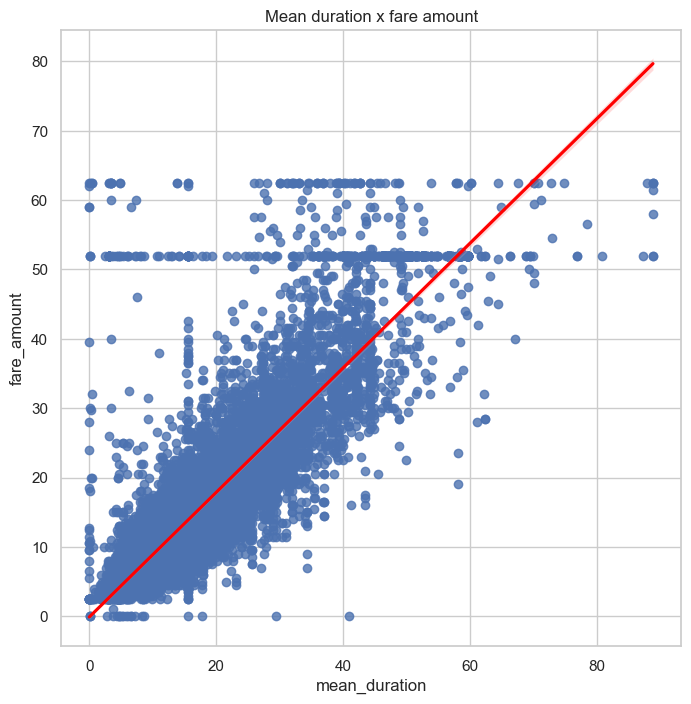

In [76]:
# Create a scatterplot to visualize the relationship between variables of interest
sns.set(style='whitegrid')
fig,ax = plt.subplots(1,1, figsize = (8,8))
sns.regplot(df['mean_duration'],df['fare_amount'], line_kws={'color' : 'red'})
plt.title('Mean duration x fare amount')

The `mean_duration` variable correlates with the target variable. 

Check the value of the rides in the second horizontal line in the scatter plot.

In [77]:
df_war = df[df['fare_amount']> 50]['fare_amount']
df_war.value_counts().head()

52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: fare_amount, dtype: int64

Examine the first 30 of these trips.

In [78]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)
df[df['fare_amount']==52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,236 132,19.211667,40.500000,sunday,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,saturday,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,saturday,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.183333,132 79,19.431667,47.275000,wednesday,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,sunday,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.833333,132 48,18.761905,58.246032,tuesday,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.616667,228 88,4.730000,15.616667,monday,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.450000,132 48,18.761905,58.246032,thursday,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.850000,186 132,17.096000,42.920000,tuesday,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.583333,132 148,17.994286,46.340476,sunday,0


It seems that almost all of the trips in the first 30 rows where the fare amount was $52 either begin or end at location 132, and all of them have a RatecodeID of 2.

There is no readily apparent reason why PULocation 132 should have so many fares of 52 dollars. They seem to occur on all different days, at different times, with both vendors, in all months. However, there are many toll amounts of $ 5.76 and $ 5.54 . This would seem to indicate that location 132 is in an area that frequently requires tolls to get to and from. It's likely this is an airport.

The data dictionary says that RatecodeID of 2 indicates trips for JFK, which is John F. Kennedy International Airport. A quick Google search for "new york city taxi flat rate $52" indicates that in 2017 (the year that this data was collected) there was indeed a flat fare for taxi trips between JFK airport (in Queens) and Manhattan.

Because RatecodeID is known from the data dictionary, the values for this rate code can be imputed back into the data after the model makes its predictions. This way you know that those data points will always be correct.

### Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [79]:
df2 = df.copy()

In [80]:
df2 = df2.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day'], axis = 1)
df2

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
0,2,6,13.0,3.521667,22.847222,0
1,1,1,16.0,3.108889,24.470370,0
2,1,1,6.5,0.881429,7.250000,1
3,2,1,20.5,3.700000,30.250000,0
4,2,1,16.5,4.435000,14.616667,0
...,...,...,...,...,...,...
22694,2,3,4.0,1.098214,8.594643,1
22695,2,1,52.0,18.757500,59.560417,0
22696,2,1,4.5,0.684242,6.609091,0
22697,2,1,10.5,2.077500,16.650000,0


### Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

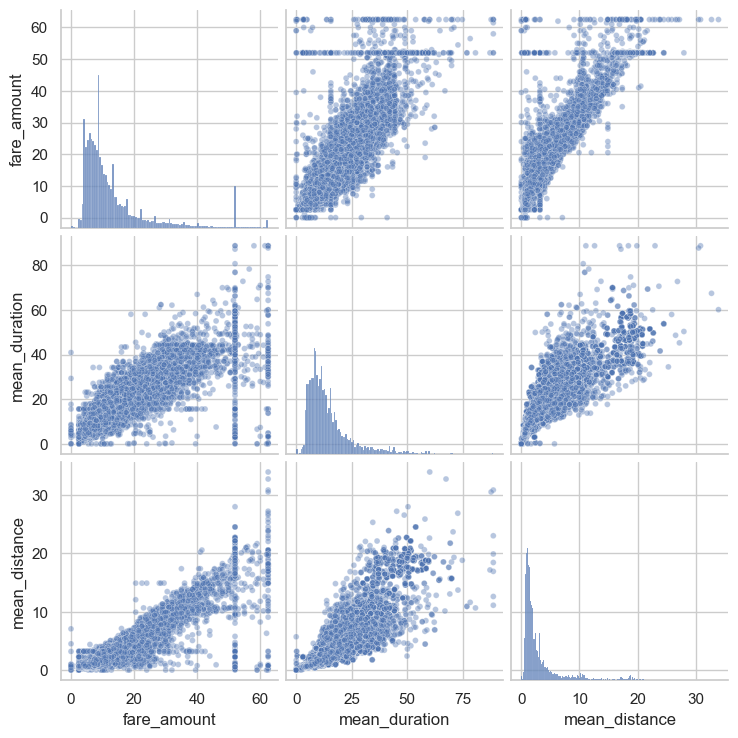

In [81]:
sns.pairplot(df[['fare_amount','mean_duration','mean_distance']],plot_kws={'alpha':0.4, 'size':5})

These variables all show linear correlation with each other. Investigate this further.

### Identify correlations

In [156]:
# Correlation matrix to help determine most correlated variables
df2.corr(method='pearson')

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004741,0.001876,-0.002874
passenger_count,0.266463,1.000000,0.014942,0.013428,0.015852,-0.022035
fare_amount,0.001045,0.014942,1.000000,0.910185,0.859105,-0.020075
mean_distance,0.004741,0.013428,0.910185,1.000000,0.874864,-0.039725
mean_duration,0.001876,0.015852,0.859105,0.874864,1.000000,-0.021583
rush_hour,-0.002874,-0.022035,-0.020075,-0.039725,-0.021583,1.000000


Visualize a correlation heatmap of the data.

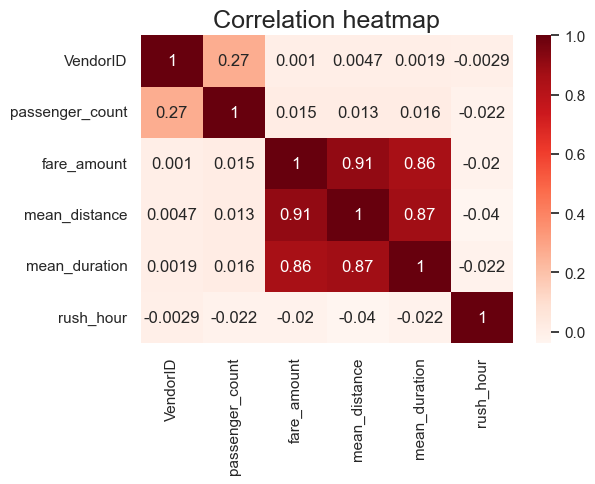

In [82]:
# Create correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df2.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap',
          fontsize=18)
plt.show()

Exemplar response: mean_duration and mean_distance are both highly correlated with the target variable of fare_amount They're also both correlated with each other, with a Pearson correlation of 0.87.

Recall that highly correlated predictor variables can be bad for linear regression models when you want to be able to draw statistical inferences about the data from the model. However, correlated predictor variables can still be used to create an accurate predictor if the prediction itself is more important than using the model as a tool to learn about your data.

This model will predict fare_amount, which will be used as a predictor variable in machine learning models. Therefore, try modeling with both variables even though they are correlated.

###  Spilit data into outcome variable and features

In [83]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.7 MB


Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [84]:
# Remove the target column from the features
X = df2.drop(columns='fare_amount')
# Set y variable
y= df2[['fare_amount']]
X.head()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,0
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


### Pre-process data


Dummy encode categorical variables

In [85]:
# Convert VendorID to string
X['VendorID'] = X['VendorID'].astype(str)
X = pd.get_dummies(X,drop_first= True)


In [86]:
X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,0,1
1,1,3.108889,24.470370,0,0
2,1,0.881429,7.250000,1,0
3,1,3.700000,30.250000,0,1
4,1,4.435000,14.616667,0,1


### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [87]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0,test_size = 0.2 )

### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [88]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[-0.50301524  0.8694684   0.17616665 -0.64893329  0.89286563]
 [-0.50301524 -0.60011281 -0.69829589  1.54099045  0.89286563]
 [ 0.27331093 -0.47829156 -0.57301906 -0.64893329 -1.11998936]
 ...
 [-0.50301524 -0.45121122 -0.6788917  -0.64893329 -1.11998936]
 [-0.50301524 -0.58944763 -0.85743597  1.54099045 -1.11998936]
 [ 1.82596329  0.83673851  1.13212101 -0.64893329  0.89286563]]


### Fit the model


In [90]:
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

### Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [91]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.8398434585044773
R^2: 0.8398434585044773
MAE: 2.1866664167754144
MSE: 17.88973296349268
RMSE: 4.229625629236313


### Test data

In [92]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

In [93]:
# Evaluate the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))


Coefficient of determination: 0.8682583641795454
R^2: 0.8682583641795454
MAE: 2.1336549840593877
MSE: 14.326454156998947
RMSE: 3.7850302716093234


###  Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [94]:
# Create a `results` dataframe
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
5818,14.0,12.356503,1.643497
18134,28.0,16.314595,11.685405
4655,5.5,6.726789,-1.226789
7378,15.5,16.227206,-0.727206
13914,9.5,10.536408,-1.036408


### Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

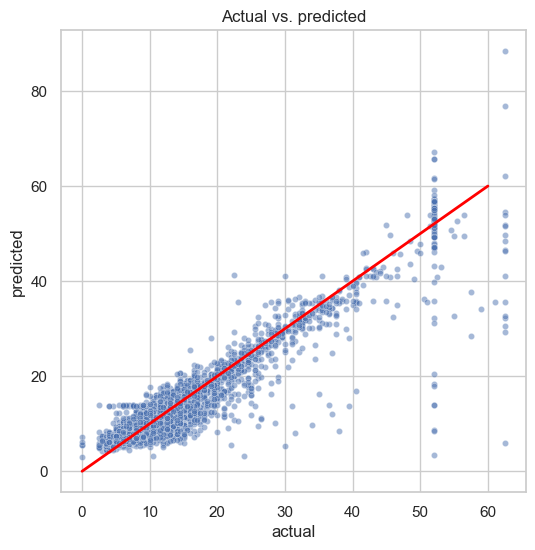

In [97]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

Visualize the distribution of the `residuals` using a histogram.

<AxesSubplot:xlabel='residual', ylabel='Count'>

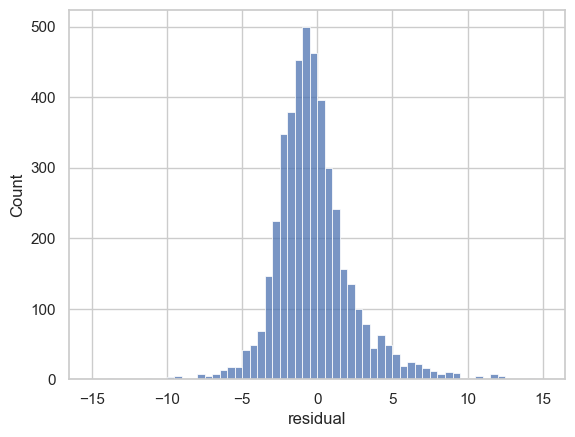

In [99]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residual'],bins=np.arange(-15,15.5,0.5))


In [100]:
# Calculate residual mean
results['residual'].mean()

-0.015442621528680704

Create a scatterplot of `residuals` over `predicted`.

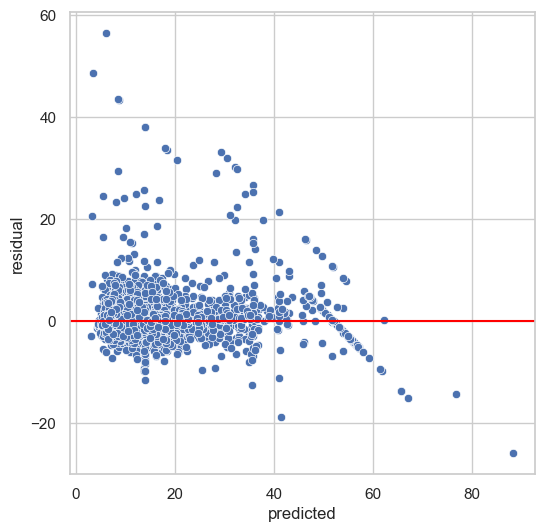

In [101]:
# Create a scatterplot of `'residuals'` over `predicted`
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(y = 'residual', x = 'predicted', data= results)
plt.axhline(0, c='red')


### Coefficients


In [103]:
# Output the model's coefficients
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.030825,7.133867,2.812115,0.110233,-0.054373


## Conclusion